# Digit Recognizer

## Import Libraries

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import tensorflow as tf

## Load Data

In [72]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('double') #convert to double precision float
x_test = x_test.astype('double')

x_train /= 255 #normalize between [0,1]
x_test /= 255

In [73]:
print(f'Training Data Shape: {x_train.shape}')
print(f'Training Ground Truth: {y_train.shape}')
print(f'Testing Data Shape: {x_test.shape}')
print(f'Testing Ground Truth : {y_test.shape}')

Training Data Shape: (60000, 28, 28)
Training Ground Truth: (60000,)
Testing Data Shape: (10000, 28, 28)
Testing Ground Truth : (10000,)


## Visualize Some Data

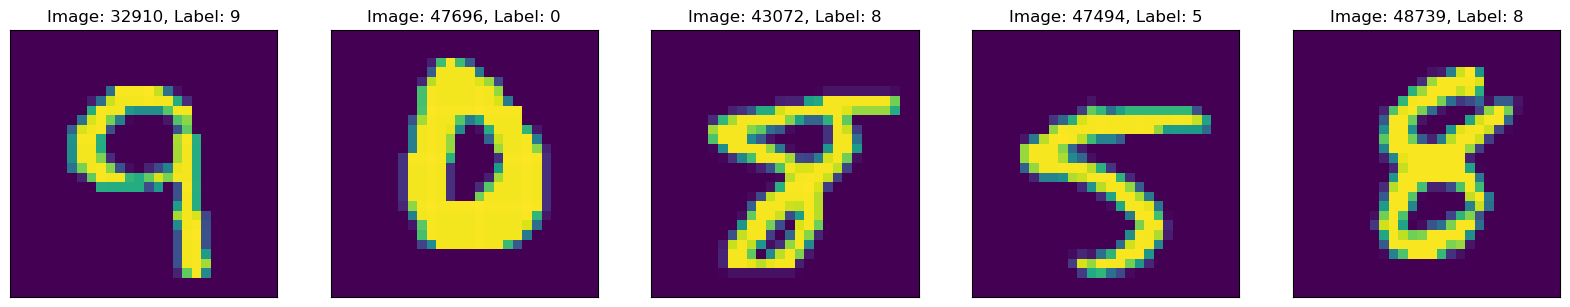

In [74]:
num_images = 5
ith_image = np.random.randint(low=0, high=x_train.shape[0], size=num_images)

fig, axs = plt.subplots(1,5, figsize=(20,4))

for i in np.arange(num_images):
    axs[i].tick_params(labelbottom=False,bottom=False,labelleft=False,left=False)
    axs[i].imshow(x_train[ith_image[i]])
    axs[i].set_title(f"Image: {ith_image[i]}, Label: {y_train[ith_image[i]]}")

## Classification Using PCA

In [84]:
pca = PCA(n_components=2)
pca.fit(x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]),y_train) #fit pca to entire training set
df = pd.DataFrame(pca.transform(x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])),columns=['PC1','PC2']) #apply transformation to testing set
df['digit'] = y_test

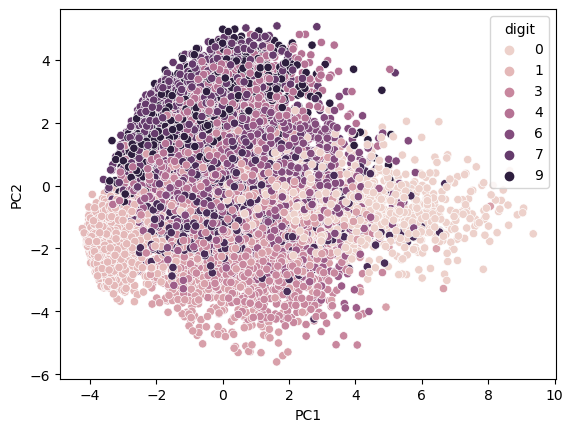

In [91]:
sns.scatterplot(data=df,x='PC1',y='PC2',hue='digit')
display()